# Test des modèles sur des images de Google Street

## Introduction

Ce notebook contient un bout de code permettant d'evaluer nos différents modèles entrainés sur des images tirés automatiquement de Google Street, afin de vérifier si ls modèles ont très bien généralisé leur apprentissage.

## Importation des modèles

In [10]:
import sys
import os


def check_path_exists(Path,Message):
    if not os.path.exists(Path):
        print(Message)
        sys.exit(1)
# Cette partie permet d'ajouter le dossier parent au path, pour pouvoir importer les modules que nous avons créés. ça peut être soit un chemin
# absolu, soit un chemin relatif. Ici, c'est un chemin absolu (à changer pour votre cas)
Path_Modules = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Modules"
Path_Models = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Models"
check_path_exists(Path_Modules,"Le chemin spécifié pour importer les modules n'existe pas. Il faut surement le modifier.")


sys.path.append(Path_Modules)
sys.path.append(Path_Models)

# Importer les module
from Preprocessing import *
from Resnet import *
from Test import *


In [7]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sys
import os

os.chdir(f'/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian')
print(os.getcwd())
def check_path_exists(Path,Message):
    if not os.path.exists(Path):
        print(Message)
        sys.exit(1)

# Cette partie permet d'ajouter le dossier parent au path, pour pouvoir importer les modules que nous avons créés. ça peut être soit un chemin
# absolu, soit un chemin relatif. Ici, c'est un chemin absolu.
Path_Modules = "./Modules"
Path_Models = "./Models"
check_path_exists(Path_Modules,"Le chemin spécifié pour importer les modules n'existe pas. Il faut surement le modifier.")

sys.path.append(Path_Modules)
sys.path.append(Path_Models)
# Importer les module



from Preprocessing import *
from Mobilenet import *
from Train import *

/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian


## Importation des images

In [14]:

folder_test_images_path = '/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Donnees_Test'

# Checker si le dossier existe
# check_path_exists(folder_test_images_path,"Le chemin spécifié pour les images n'existe pas. Il faut surement le modifier.")


In [15]:
resize=True
size=(224,224)
normalize=True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Images_Original,Images = import_images_nparrays_test(folder_test_images_path, resize=True, size=(224,224), normalize=True)

Images = torch.tensor(Images, dtype=torch.float32)

Images = Images.to(device)






/tmp/ipykernel_15761/2836749281.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  Images = torch.tensor(Images, dtype=torch.float32)


## Affichage des images pour visualisation

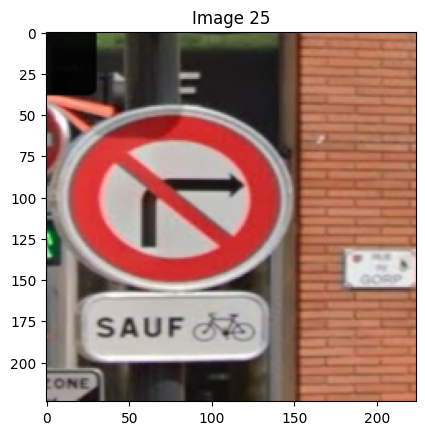

In [16]:
# Afficher les images


import matplotlib.pyplot as plt
import numpy as np
# Plot the first image
nb = np.random.randint(0,Images.shape[0],1)[0]
Image_To_Plot = Images_Original[nb]

Image_To_Plot= np.transpose(Image_To_Plot, (0, 1, 2))
plt.imshow(Image_To_Plot)
plt.title(f"Image {nb}")
plt.show()

## Importation des modèles

Ici on définit un dictionnaire qui va contenir les paths des différents modèles de prédictions

In [17]:


model_type_path = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/Model_Types.pth"

model_Dangers_path = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/Model_Dangers.pth"

model_Fin_Interdictions_path = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/ Model_Fin_Interdictions.pth"

model_Obligations_path = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/Model_Obligatiobs.pth"

model_Indications_path = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/Model_Indications.pth"

model_Interdictions_path = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/Model_Interdictions.pth"


# Gather models in Dict

models_paths = {
    "Types": model_type_path,
    "Dangers": model_Dangers_path,
    "Fin_Interdictions": model_Fin_Interdictions_path,
    "Obligations": model_Obligations_path,
    "Indications": model_Indications_path,
    "Interdictions": model_Interdictions_path
}


On définit ici le path des différents dictionnaires d'encodages.

In [26]:
dict_paths = "/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Encoding_Dictionaries/"


## Test sur les images de street view

In [27]:
Nb_Images_To_Test = 10
test_images(Nb_Images_To_Test,Images,models_paths,dict_paths)

/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/./Modules/Test.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path)


torch.Size([1, 224, 224, 3])


FileNotFoundError: [Errno 2] No such file or directory: '/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian/Saved_Models/Fin_Interdictions.pth'

## Analyse de la robustesse de nos modèles

Afin d'analyser la robustesse de nos modèles, on va essayer d'appliquer des transformations basiques sur nos images et voir si la prédiction va changer ou pas, permettant ainsi de voir si nos modèles sont robustes ou pas.

### Définitions des transformations qu'on va appliquer

In [8]:
import torch
from torchvision.transforms.v2 import *
from torchvision import transforms, utils

In [ ]:
List_Transforms = [
        RandomHorizontalFlip(0),
        RandomVerticalFlip(0.7),
        RandomRotation(25),
        # RandomPerspective(),
        ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        RandomAffine(degrees=10),
        GaussianBlur(5),
        transforms.Lambda(lambda img: img + torch.randn_like(img)*0.05),
    ] 
    
Transforms = Compose([
        RandomApply(List_Transforms, p=1),
        ToTensor()
    ])

In [10]:
def Transform_Image(Image,Transforms):
    Image_To_Transform =  torch.tensor(torch.permute(Image,(2, 0, 1)))

    Image_Transformed = Transforms(Image_To_Transform)


    return Image, Image_Transformed


def Plot_Image_And_Image_Transformed(Image,Image_Transformed,title_left="Image Original",title_right="Image Transformée"):

    fig,axes = plt.subplots(1,2,figsize=(20,6))

    axes[0].imshow(Image.cpu().numpy())

    axes[0].set_title(title_left)



    Image_Transformed = torch.permute(Image_Transformed,(1,2,0))
    axes[1].imshow(Image_Transformed.cpu().numpy())

    axes[1].set_title(title_right)


    plt.show()
    



In [ ]:
# Plot the first image
nb = np.random.randint(0,Images.shape[0],1)[0]
Image = Images[nb]


Image , Image_Transformed = Transform_Image(Image,Transforms)

Plot_Image_And_Image_Transformed(Image,Image_Transformed)


In [12]:

def test_images_transformed(nbimages,images,folder_models_path,dict_paths,transforms):

    for i in range(nbimages):

        Image = random.choice(images)


        type_pannel,label = test_image(Image,folder_models_path,dict_paths)

        Image,Image_Transformed = Transform_Image(Image,Transforms)
        # Image = torch.tensor(Image).to(device=device)
        # Image_Transformed = torch.tensor(Image_Transformed).to(device=device)

        Image_Transformed=Image_Transformed.permute(1,2,0)
        type_pannel_transformed,label_transformed = test_image(Image_Transformed,folder_models_path,dict_paths)
        Image_Transformed=Image_Transformed.permute(2,0,1)
        Title_Left= f'Type pannel: {type_pannel} - Label: {label}'
        Title_Right = f'Type pannel: {type_pannel_transformed} - Label: {label_transformed}'
        Plot_Image_And_Image_Transformed(Image,Image_Transformed,title_left=Title_Left,title_right=Title_Right)

    return None



In [ ]:
test_images_transformed(1,Images,models_paths,dict_paths,transforms=Transforms)